In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Loading the digits dataset
data = datasets.load_digits()

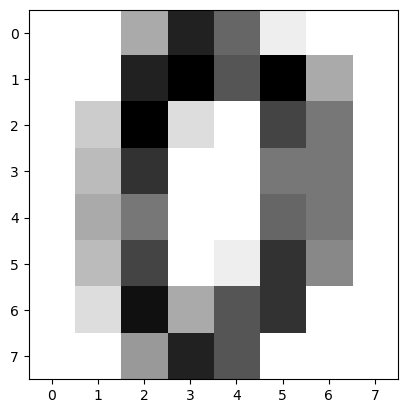

In [3]:
# Displaying an image from the dataset
plt.subplot()
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [4]:
# Displaying the target value of the first image
data.target[0]

0

In [5]:
# Creating a list of images and their corresponding labels
images_and_labels = list(zip(data.images, data.target))

In [6]:
# Displaying the first image and its label
images_and_labels[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

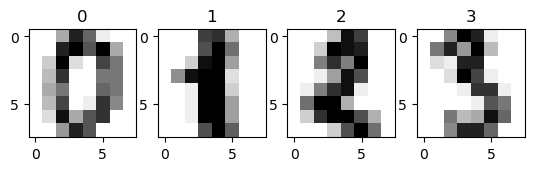

In [7]:
# Displaying the first 4 images and their labels
for i, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [8]:
# Reshaping the images into a 2D array
X = data.images.reshape((len(data.images), -1))

In [9]:
# Displaying the shape of the reshaped array
np.shape(X)

(1797, 64)

In [10]:
# Displaying the target variable
y = data.target
len(y)

1797

In [11]:
# Importing Support Vector Classifier
from sklearn.svm import SVC

In [12]:
# Creating an instance of SVC
svm_classifier = SVC()

In [13]:
# Fitting the model
svm_classifier.fit(X, y)

SVC()

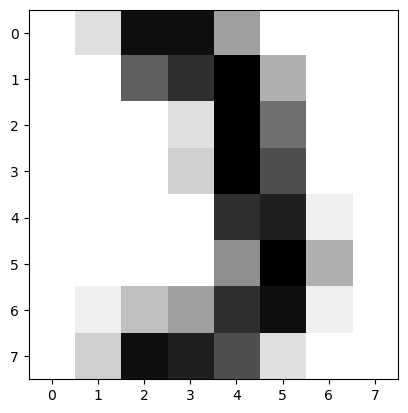

In [14]:
# Displaying an image to predict
plt.subplot()
plt.imshow(data.images[190], cmap=plt.cm.gray_r)

In [15]:
# Predicting the value of the image using the model
svm_classifier.predict([X[200], X[190]])

array([1, 3])

In [16]:
# Modifying an image
u = data.images[190]
u[0, 1] = 10
u[3, 2] = 16
u[6, 3] = 8
u[6, 1] = 0
u

array([[ 0., 10., 15., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  9.,  0.,  0.],
       [ 0.,  0., 16.,  3., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  5.,  0.],
       [ 0.,  0.,  4.,  8., 13., 15.,  1.,  0.],
       [ 0.,  3., 15., 14., 11.,  2.,  0.,  0.]])

In [17]:
# Reshaping the modified image
u = u.reshape(-1)
u

array([ 0., 10., 15., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 13., 16.,
        5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
       16.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  1.,
        0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  4.,  8.,
       13., 15.,  1.,  0.,  0.,  3., 15., 14., 11.,  2.,  0.,  0.])

In [18]:
# Predicting the value of the modified image
svm_classifier.predict([u])

array([3])

In [19]:
# Importing necessary libraries for model evaluation
from sklearn import metrics

In [20]:
# Predicting using a new instance of SVC
svm_new = SVC()
svm_new.fit(X[:1000], y[:1000])
p = svm_new.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.97      0.96      0.97        80
           2       1.00      0.97      0.99        77
           3       0.97      0.85      0.91        79
           4       0.99      0.95      0.97        83
           5       0.92      0.99      0.95        82
           6       0.99      0.99      0.99        80
           7       0.94      0.99      0.96        80
           8       0.92      0.96      0.94        76
           9       0.92      0.95      0.93        81

    accuracy                           0.96       797
   macro avg       0.96      0.96      0.96       797
weighted avg       0.96      0.96      0.96       797



In [21]:
# Displaying the confusion matrix
print(metrics.confusion_matrix(e, p))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 77  0  0  0  0  0  0  1  2]
 [ 1  0 75  1  0  0  0  0  0  0]
 [ 0  0  0 67  0  3  0  4  5  0]
 [ 0  0  0  0 79  0  0  0  0  4]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  1  0 79  0  0]
 [ 0  1  0  0  0  1  0  0 73  1]
 [ 0  0  0  1  0  2  0  1  0 77]]
